# tsfresh特征自动化提取、过滤

In [60]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [ ]:
def preprocessing():
    F = r'f:\Data_Warehouse\ProbeInfo\stay_num_zong_2011.csv'
    stay_num = pd.read_csv(F, encoding='gbk', sep='\t')
    stay_num.sort_values(by=['taz', 'timeperiod'], inplace=True)
    stay_num['ts'] = stay_num.timeperiod.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    stay_num['day_of_week'] = stay_num.ts.apply(lambda x: x.isoweekday())
    stay_num['day_of_month'] = stay_num.timeperiod.apply(lambda x: x.split(' ')[0].split('-')[2])
    stay_num['week'] = stay_num.ts.apply(lambda x: x.week)
    stay_num['month'] = stay_num.ts.apply(lambda x: x.month)
    stay_num['hour'] = stay_num.ts.apply(lambda x: x.hour)
    stay_num = stay_num.drop(['ts', 'timeperiod'], axis=1)
    stay_num.reset_index(drop=True)
    stay_num.to_csv(F.replace('.csv', '_processed.csv'), index=False)

## 加载数据

In [46]:
F_processed = r'f:\Data_Warehouse\ProbeInfo\stay_num_zong_2011_processed.csv'
stay_num = pd.read_csv(F_processed)
stay_num['id'] = stay_num.index
df_sel = stay_num[stay_num['taz'].isin([50005,  50006,  50007, 105330, 105332, 105349])]

In [48]:
y = df_sel['num']
df = df_sel[['id', 'taz', 'day_of_month', 'week', 'month', 'hour', 'day_of_week']]

In [47]:
stay_num.head()

,taz,num,day_of_month,week,month,hour,day_of_week,id
0,50005,311,19,20,5,0,4,0
1,50005,468,19,20,5,1,4,1
2,50005,532,19,20,5,2,4,2
3,50005,494,19,20,5,3,4,3
4,50005,480,19,20,5,4,4,4


## 特征提取

In [71]:
extraction_settings = ComprehensiveFCParameters()
extraction_settings

{'abs_energy': None,
 'absolute_sum_of_changes': None,
 'agg_autocorrelation': [{'f_agg': 'mean'},
  {'f_agg': 'median'},
  {'f_agg': 'var'}],
 'agg_linear_trend': [{'attr': 'rvalue', 'chunk_len': 5, 'f_agg': 'max'},
  {'attr': 'rvalue', 'chunk_len': 5, 'f_agg': 'min'},
  {'attr': 'rvalue', 'chunk_len': 5, 'f_agg': 'mean'},
  {'attr': 'rvalue', 'chunk_len': 5, 'f_agg': 'var'},
  {'attr': 'rvalue', 'chunk_len': 10, 'f_agg': 'max'},
  {'attr': 'rvalue', 'chunk_len': 10, 'f_agg': 'min'},
  {'attr': 'rvalue', 'chunk_len': 10, 'f_agg': 'mean'},
  {'attr': 'rvalue', 'chunk_len': 10, 'f_agg': 'var'},
  {'attr': 'rvalue', 'chunk_len': 50, 'f_agg': 'max'},
  {'attr': 'rvalue', 'chunk_len': 50, 'f_agg': 'min'},
  {'attr': 'rvalue', 'chunk_len': 50, 'f_agg': 'mean'},
  {'attr': 'rvalue', 'chunk_len': 50, 'f_agg': 'var'},
  {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'max'},
  {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'min'},
  {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'mean'},
  {'at

In [50]:
X_filtered = extract_relevant_features(df, y, 
                                       column_id='id', column_sort='day_of_month', 
                                       default_fc_parameters=extraction_settings, ml_task='regression')

Feature Extraction: 100%|██████████████████| 3460/3460 [02:53<00:00, 19.98it/s]
 'day_of_week__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"'
 'day_of_week__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"'
 ..., 'week__spkt_welch_density__coeff_2'
 'week__spkt_welch_density__coeff_5' 'week__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [79]:
X_filtered.shape

(692, 20)

## 训练预测

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=1)

In [69]:
from sklearn.tree import DecisionTreeRegressor
r = DecisionTreeRegressor()
r.fit(X_train, Y_train)

print(mean_squared_error(Y_test, r.predict(X_test)))

130159.454835


In [72]:
y_test = list(Y_test)
y_predicted = [int(y) for y in list(r.predict(X_test))]
Y = pd.DataFrame(list(zip(y_test, y_predicted)), columns=['original', 'predicted'])

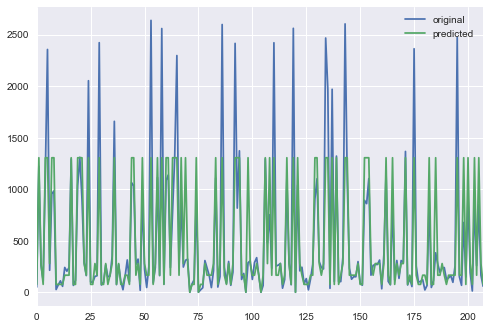

In [76]:
Y.plot()
plt.show()

In [77]:
Y

,original,predicted
0,51,77
1,1221,1305
2,263,279
3,112,77
4,1147,1305
5,2355,1305
6,214,279
7,955,1305
8,983,1305
9,27,77
